In [29]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_boston
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt

Cumulative Contribution Ratio:  0.3619884809992632
Cumulative Contribution Ratio:  0.5540633835693527
Cumulative Contribution Ratio:  0.6652996889318524
Cumulative Contribution Ratio:  0.7359899907589929
Cumulative Contribution Ratio:  0.8016229275554788
Cumulative Contribution Ratio:  0.8509811607477045
Cumulative Contribution Ratio:  0.8933679539739376
Cumulative Contribution Ratio:  0.9201754434577263
Cumulative Contribution Ratio:  0.9423969775056235
Cumulative Contribution Ratio:  0.9616971684450643
Cumulative Contribution Ratio:  0.9790655253449634
Cumulative Contribution Ratio:  0.9920478511010055


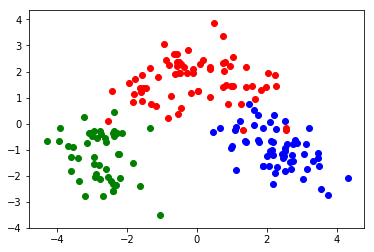

In [5]:
# PCA for visualization

DATA = load_wine()
label=DATA.target
dataset=pd.DataFrame(DATA.data, columns=DATA.feature_names)
dataset=scipy.stats.zscore(dataset)
for i in range(1,np.shape(dataset)[1]):
    pca=PCA(n_components=i)
    pca.fit(dataset)
    contribution_ratio=pca.explained_variance_ratio_
    print('Cumulative Contribution Ratio: ',np.sum(np.asarray(contribution_ratio)))
    
    if i==2:
        data_trans=pca.transform(dataset)
        
        for j in range(len(dataset)):
          
            if label[j]==0:
                plt.scatter(data_trans[j,0],data_trans[j,1],color='blue')
           
            elif label[j]==1:
                plt.scatter(data_trans[j,0],data_trans[j,1],color='red')
            
            else:
                plt.scatter(data_trans[j,0],data_trans[j,1],color='green')

plt.show()

[array([[ 0.515585  , -0.17031473],
       [ 0.39058393, -0.17208474],
       [-1.13052164,  0.95575343],
       [-1.46230363,  0.55169135]]), array([[ 0.77506505,  1.34205604, -2.07247844, -0.93810662],
       [ 3.46990738,  1.62185066,  2.78466752,  1.68399725]])]
score:  0.752990826200374


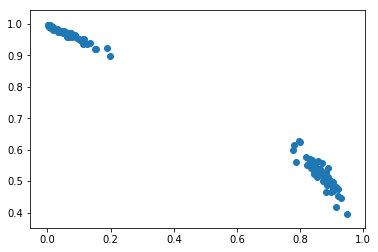

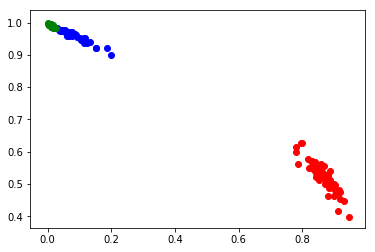

In [3]:
# Auto Encoder for visualization

from sklearn.datasets import load_iris
#from sklearn.datasets import load_wine
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt


sample_data=load_iris()
#sample_data=load_wine()
train_X=sample_data.data
#print(train_X)

MLPR=MLPRegressor(hidden_layer_sizes=(2,),activation='logistic',max_iter=10000)
MLPR.fit(train_X,train_X)

# weights
W=MLPR.coefs_ 

print(W)
W_1=W[0]
print('score: ',MLPR.score(train_X,train_X))

def logistic(x):
    return 1/(1+np.exp(-x))

data_transformed=logistic(np.dot(train_X,W_1))

plt.scatter(x=data_transformed[:,0],y=data_transformed[:,1])


target_value=sample_data.target

plt.figure()

for i in range(len(target_value)):
    if target_value[i]==0:
        plt.scatter(x=data_transformed[i,0],y=data_transformed[i,1],color='r')
    elif target_value[i]==1:
        plt.scatter(x=data_transformed[i,0],y=data_transformed[i,1],color='b')
    else:
        plt.scatter(x=data_transformed[i,0],y=data_transformed[i,1],color='g')

In [46]:
# Data Preparation

D=load_boston()
t=D.target
X=pd.DataFrame(D.data,columns=D.feature_names)
X=scipy.stats.zscore(X)
X=pd.DataFrame(X,columns=D.feature_names)
#X=X.drop('ZN',axis=1)

In [47]:
# PCA

number_of_PCs=2
pca=PCA(n_components=number_of_PCs)
pca.fit(X)
X_transformed=pca.transform(X)
#print(X_transformed)
contribution_ratio=pca.explained_variance_ratio_
print('Cumulative Contribution Ratio with ',i,' PCs: ',np.sum(np.asarray(contribution_ratio)))

Cumulative Contribution Ratio with  13  PCs:  0.6339377489194171


In [51]:
# Factor Analysis

number_of_Factors=3
FA=FactorAnalysis(n_components=number_of_Factors,tol=0.0001,max_iter=100000)
FA.fit(X)
X_transformed=FA.transform(X)
#print(X_transformed)
print('iterated ',FA.n_iter_,' times')
print('Log Likelihood: ',FA.loglike_[FA.n_iter_-1])

# FA.score_samples calculates log likelihood of each sample 
print(np.sum(FA.score_samples(X)))

# FA.components returns Factor Loadings
Factor_Loadings=FA.components_.T

result=pd.DataFrame(Factor_Loadings,columns=list(range(1,number_of_Factors+1)),index=X.columns)
print(result)

iterated  101  times
Log Likelihood:  -5985.283967303671
-5985.283967315226
                1         2         3
CRIM     0.627462 -0.110107 -0.067815
INDUS    0.786893  0.330398  0.036329
NOX      0.789505  0.372661  0.209285
RM      -0.359650 -0.402173  0.690700
AGE      0.651885  0.473772  0.231045
DIS     -0.683306 -0.446003 -0.326343
RAD      0.917195 -0.307684 -0.004374
TAX      0.934513 -0.173149 -0.038171
PTRATIO  0.472489 -0.066582 -0.302477
B       -0.475131  0.033179 -0.003540
LSTAT    0.656574  0.389496 -0.316519


In [52]:
# Auto Encoder

def logistic(x):
    return 1/(1+np.exp(-x))

def relu(x):
    sign=(x>=0)
    return x*sign

MLPR=MLPRegressor(hidden_layer_sizes=(8,),activation='relu',max_iter=10000)
MLPR.fit(X,X)

# weights
W=MLPR.coefs_ 
W_1=W[0]

print('score: ',MLPR.score(X,X))

#X_transformed=logistic(np.dot(X,W_1))
X_transformed=relu(np.dot(X,W_1))

score:  0.9036043365297842
